<<<<~~~~~~~~~~~~~~~>>>> COUNTING SORT ALGORITHM IMPLEMENTATION <<<<~~~~~~~~~~~~~~~>>>>

--- INPUT PHASE ---
Enter non-negative integers separated by space:

~~~~~> Original Array: <~~~~~
[1, 3, 4, 1, 2, 2, 5, 7]

--- MAXIMUM ELEMENT PHASE ---
Maximum element found: 7

--- FREQUENCY COUNT PHASE ---
Frequency array:
Value 0 occurs 0 times
Value 1 occurs 2 times
Value 2 occurs 2 times
Value 3 occurs 1 times
Value 4 occurs 1 times
Value 5 occurs 1 times
Value 6 occurs 0 times
Value 7 occurs 1 times

--- CUMULATIVE COUNT PHASE ---
Cumulative count array:
[0, 2, 4, 5, 6, 7, 7, 8]

--- OUTPUT CONSTRUCTION PHASE ---
==> Placing 7 at position 7, ==> updated count array: [0, 2, 4, 5, 6, 7, 7, 7]
==> Placing 5 at position 6, ==> updated count array: [0, 2, 4, 5, 6, 6, 7, 7]
==> Placing 2 at position 3, ==> updated count array: [0, 2, 3, 5, 6, 6, 7, 7]
==> Placing 2 at position 2, ==> updated count array: [0, 2, 2, 5, 6, 6, 7, 7]
==> Placing 1 at position 1, ==> updated count array: [0, 1, 2, 5, 6

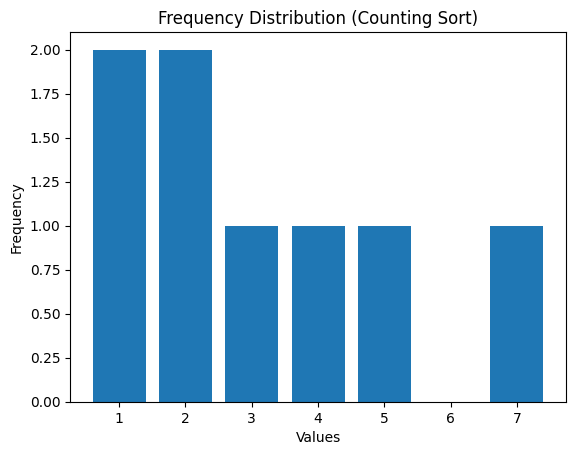


~~~~~>>>> GRAPH MENU <<<<<~~~~~
1. Show Frequency Graph
2. Show Original vs Sorted Graph
3. Exit Graph Menu


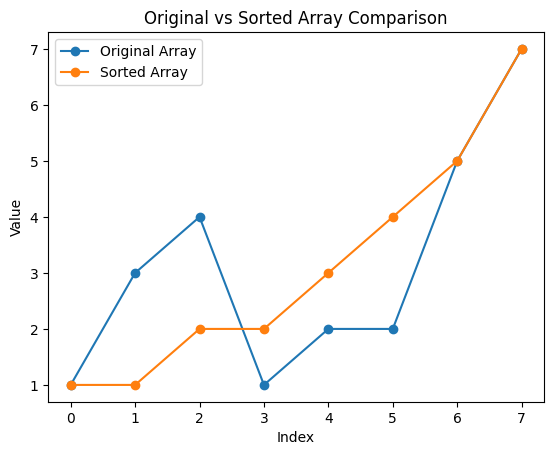


~~~~~>>>> GRAPH MENU <<<<<~~~~~
1. Show Frequency Graph
2. Show Original vs Sorted Graph
3. Exit Graph Menu
<<<<===== EXITING GRAPH VIEW =====>>>>


In [1]:
# =========================================================
# DAA INDIVIDUAL PROJECT
# TITLE: Counting Sort Algorithm Implementation
# =========================================================

import matplotlib.pyplot as plt


def read_input():
    """
    This function reads input from the user,
    validates it, and returns a list of integers.
    """
    print("\n--- INPUT PHASE ---")
    print("Enter non-negative integers separated by space:")

    try:
        arr = list(map(int, input().split()))
    except ValueError:
        print("<<<<<===== INVALID INPUT! ENTER ONLY INTEGERS =====>>>>>")
        return None

    if len(arr) == 0:
        print("<<<<<===== ARRAY IS EMPTY. SORTING NOT POSSIBLE =====>>>>>")
        return None

    for num in arr:
        if num < 0:
            print("<<<<<===== COUNTING SORT DOES NOT SUPPORT NEGATIVE NUMBERS =====>>>>>")
            return None

    return arr


def find_maximum(arr):
    """
    Finds the maximum element in the array.
    """
    print("\n--- MAXIMUM ELEMENT PHASE ---")
    max_val = arr[0]
    for i in range(1, len(arr)):
        if arr[i] > max_val:
            max_val = arr[i]

    print(f"Maximum element found: {max_val}")
    return max_val


def build_frequency_array(arr, max_val):
    """
    Builds frequency array based on input array.
    """
    print("\n--- FREQUENCY COUNT PHASE ---")
    count = [0] * (max_val + 1)

    for num in arr:
        count[num] += 1

    print("Frequency array:")
    for i in range(len(count)):
        print(f"Value {i} occurs {count[i]} times")

    return count


def build_cumulative_count(count):
    """
    Converts frequency array into cumulative count array.
    """
    print("\n--- CUMULATIVE COUNT PHASE ---")
    for i in range(1, len(count)):
        count[i] += count[i - 1]

    print("Cumulative count array:")
    print(count)
    return count


def build_sorted_array(arr, count):
    """
    Builds sorted array using cumulative count.
    """
    print("\n--- OUTPUT CONSTRUCTION PHASE ---")
    output = [0] * len(arr)

    for i in range(len(arr) - 1, -1, -1):
        current = arr[i]
        position = count[current] - 1
        output[position] = current
        count[current] -= 1

        print(
            f"==> Placing {current} at position {position}, "
            f"==> updated count array: {count}"
        )

    return output


# -------------------------------
# GRAPH MODULE (ADDED)
# -------------------------------
def show_frequency_graph(arr):
    values = list(set(arr))
    frequencies = [arr.count(v) for v in values]

    plt.bar(values, frequencies)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Frequency Distribution (Counting Sort)")
    plt.show()


def show_comparison_graph(original, sorted_arr):
    plt.plot(original, label="Original Array", marker='o')
    plt.plot(sorted_arr, label="Sorted Array", marker='o')
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Original vs Sorted Array Comparison")
    plt.legend()
    plt.show()


def graph_menu(original, sorted_arr):
    while True:
        print("\n~~~~~>>>> GRAPH MENU <<<<<~~~~~")
        print("1. Show Frequency Graph")
        print("2. Show Original vs Sorted Graph")
        print("3. Exit Graph Menu")

        choice = input("Enter choice: ")

        if choice == "1":
            show_frequency_graph(original)
        elif choice == "2":
            show_comparison_graph(original, sorted_arr)
        elif choice == "3":
            print("<<<<===== EXITING GRAPH VIEW =====>>>>")
            break
        else:
            print("<<<<<===== INVALID GRAPH CHOICE =====>>>>")


def counting_sort():
    """
    Main function that controls Counting Sort execution.
    """
    print("==============================================")
    print("<<<<~~~~~~~~~~~~~~~>>>> COUNTING SORT ALGORITHM IMPLEMENTATION <<<<~~~~~~~~~~~~~~~>>>>")
    print("==============================================")

    arr = read_input()
    if arr is None:
        return

    print("\n~~~~~> Original Array: <~~~~~")
    print(arr)

    max_val = find_maximum(arr)
    count = build_frequency_array(arr, max_val)
    cumulative_count = build_cumulative_count(count)
    sorted_array = build_sorted_array(arr, cumulative_count)

    print("\n--- FINAL OUTPUT ---")
    print("~~~~~> Sorted Array: <~~~~~")
    print(sorted_array)

    print("\n<<<<============>>>> SORTING COMPLETED SUCCESSFULLY <<<<============>>>>")

    # GRAPH SECTION (AFTER FINAL ANSWER)
    graph_menu(arr, sorted_array)


# Program Execution Starts Here
counting_sort()
